In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
tourism=pd.read_csv('tourism.csv')
rating=pd.read_csv('rating.csv')
user=pd.read_csv('user.csv')

In [6]:
tourism.head()

,Place_Id,Place_Name,Description,Category,City,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.5


In [7]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [8]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [9]:
num_places = len(tourism['Place_Id'].unique())
print("Number of places in the dataset:", num_places)

num_users = len(user['User_Id'].unique())
print("Number of users:", num_users)

num_ratings = len(rating)
print("Total number of ratings:", num_ratings)


Number of places in the dataset: 437
Number of users: 300
Total number of ratings: 10000


In [10]:
tourism.shape


(437, 6)

In [11]:
user.shape

(300, 3)

In [12]:
rating.shape

(10000, 3)

In [13]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Rating       437 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 20.6+ KB


In [14]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [15]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [16]:
tourism.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Rating         0
dtype: int64

In [17]:
rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [18]:
user.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [19]:
import numpy as np
tourism_all = np.union1d(tourism['Place_Id'].unique(), rating['Place_Id'].unique())
total_tourism = len(tourism_all)
print("Total number of tourism:",total_tourism)

Total number of tourism: 437


In [20]:
all_tourism_rate = rating.copy()
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [21]:
all_tourism = pd.merge(all_tourism_rate,tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [22]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


In [23]:
all_tourism.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [24]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [25]:
prep = all_tourism.drop_duplicates(subset='Place_Id')
prep

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [26]:
place_id, place_name, place_category, place_desc, place_city, city_category = prep[['Place_Id', 'Place_Name', 'Category', 'Description', 'City', 'city_category']].values.T.tolist()

In [27]:
tourism_new = pd.DataFrame({
    "id": prep['Place_Id'],
    "name": prep['Place_Name'],
    "category": prep['Category'],
    "description": prep['Description'],
    "city": prep['City'],
    "city_category": prep['city_category']
})
tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
2008,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
2399,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
2448,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
2534,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


In [28]:
pip install Scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sai priyanka\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


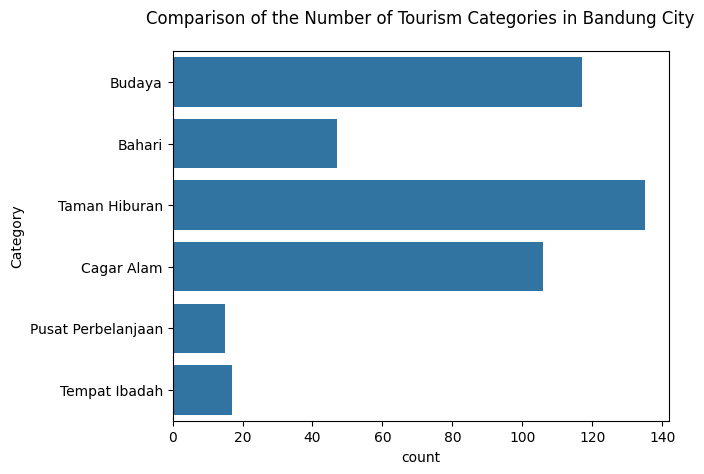

In [29]:
sns.countplot(y='Category', data=prep)
plt.title('Comparison of the Number of Tourism Categories in Bandung City', pad=20)
plt.show()

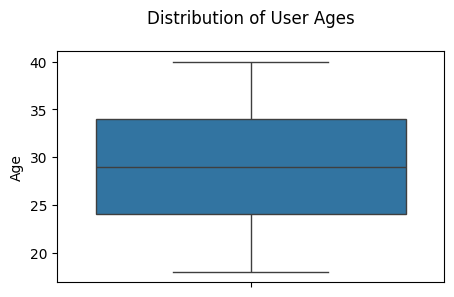

In [30]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribution of User Ages', pad=20)
plt.show()

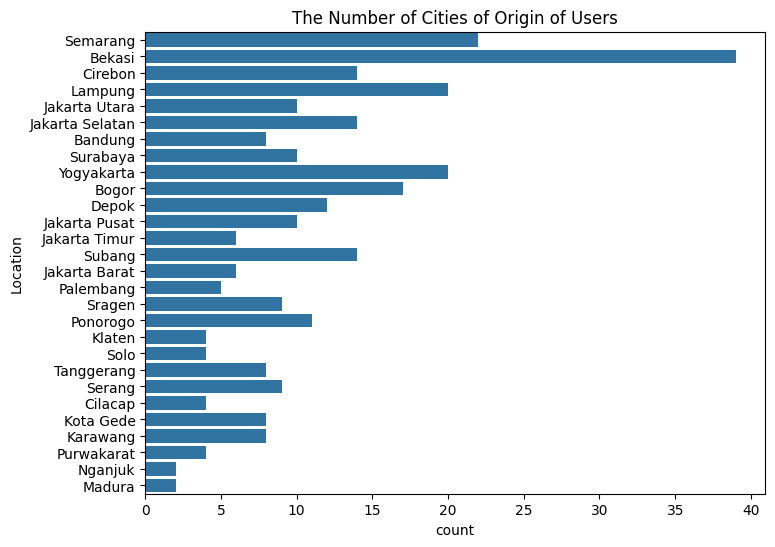

In [31]:
City_of_Origin= user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=City_of_Origin)
plt.title('The Number of Cities of Origin of Users')
plt.show()

In [32]:
ds = tourism_new
ds.sample(5)

,id,name,category,description,city,city_category
329,72,Waterboom PIK (Pantai Indah Kapuk),Taman Hiburan,Waterbom Jakarta merupakan sebuah wahana perma...,Jakarta,Jakarta Taman Hiburan
240,417,Klenteng Sanggar Agung,Budaya,Kelenteng Sanggar Agung atau Klenteng Hong San...,Surabaya,Surabaya Budaya
620,22,Masjid Istiqlal,Tempat Ibadah,Masjid Istiqlal (arti harfiah: Masjid Merdeka)...,Jakarta,Jakarta Tempat Ibadah
207,306,Sungai Palayangan,Cagar Alam,Sungai Palayangan terletak di Kawasan Objek Wi...,Bandung,Bandung Cagar Alam
1202,155,Pantai Ngobaran,Bahari,Pantai Ngobaran merupakan salah satu tempat wi...,Yogyakarta,Yogyakarta Bahari


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(ds['city_category'])
print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [34]:
cv_matrix = cv.transform(ds['city_category']) 
cv_matrix.shape

(437, 15)

In [35]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [36]:
df = pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index=ds['name']
)
df.sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Glamping Lakeside Rancabali,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
Taman Sejarah Bandung,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Jembatan Pasupati,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
Kampung Wisata Rejowinangun,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Hutan Mangrove Kulon Progo,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(cv_matrix)
cosine

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [38]:
cosine_sim = pd.DataFrame(cosine,index=ds['name'],columns=ds['name'])
cosine_sim.sample(5,axis=1).sample(10,axis=0)

name,Puncak Pinus Becici,Lava Bantal,Candi Prambanan,Jogja Exotarium,Monumen Yogya Kembali
name,,,,,
Taman Mundu,0.666667,0.0,0.0,0.666667,0.0
Gereja Tiberias Indonesia Bandung,0.000000,0.0,0.0,0.000000,0.0
Taman Kasmaran,0.666667,0.0,0.0,0.666667,0.0
Pantai Ngrenehan,0.408248,0.5,0.5,0.408248,0.5
GPIB Immanuel Semarang (Gereja Blenduk),0.000000,0.0,0.0,0.000000,0.0
Taman Jomblo,0.666667,0.0,0.0,0.666667,0.0
Taman Harmoni Keputih,0.000000,0.0,0.0,0.000000,0.0
Amazing Art World,0.000000,0.5,0.5,0.000000,0.5
Tugu Muda Semarang,0.000000,0.5,0.5,0.000000,0.5


In [39]:
def tourism_recommendations(place_name,similarity_data=cosine_sim,items=ds[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [40]:
tourism_recommendations("SnowBay Waterpark")

,name,category,description,city
0,Taman Impian Jaya Ancol,Taman Hiburan,Taman Impian Jaya Ancol merupakan sebuah objek...,Jakarta
1,Waterboom PIK (Pantai Indah Kapuk),Taman Hiburan,Waterbom Jakarta merupakan sebuah wahana perma...,Jakarta
2,Sea World,Taman Hiburan,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta
3,The Escape Hunt,Taman Hiburan,Escape Hunt adalah salah satu tempat rekreasi ...,Jakarta
4,Dunia Fantasi,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta
